# 5. Write a program to perform the Arithmetic coding and decoding techniques on an image and compute Compression Ratio.

Encoded Value (first 10 digits): 0.99983803
Compression Ratio: 15540.59


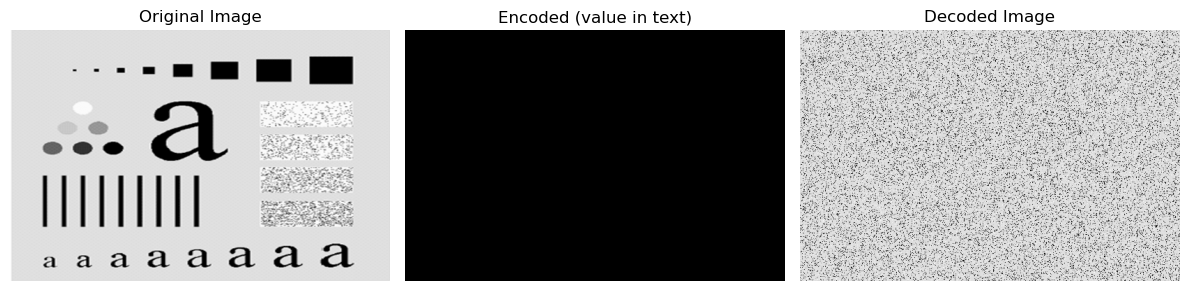

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at {path}")
    return img

def calculate_probabilities(data):
    freq = Counter(data)
    total = len(data)
    prob = {k: v / total for k, v in sorted(freq.items())}
    return prob

def build_ranges(probabilities):
    ranges = {}
    low = 0.0
    for symbol, prob in probabilities.items():
        high = low + prob
        ranges[symbol] = (low, high)
        low = high
    return ranges

def arithmetic_encode(data, ranges):
    low = 0.0
    high = 1.0
    for symbol in data:
        sym_low, sym_high = ranges[symbol]
        range_width = high - low
        high = low + range_width * sym_high
        low = low + range_width * sym_low
    return (low + high) / 2  

def arithmetic_decode(code, ranges, total_symbols):
    reverse_ranges = {symbol: (low, high) for symbol, (low, high) in ranges.items()}
    decoded = []
    for _ in range(total_symbols):
        for symbol, (low, high) in reverse_ranges.items():
            if low <= code < high:
                decoded.append(symbol)
                code = (code - low) / (high - low)
                break
    return decoded

def compute_compression_ratio(original_img, encoded_value):
    original_bits = original_img.size * 8
    encoded_bits = len(f"{encoded_value:.100f}".replace('.', '')) 
    ratio = original_bits / encoded_bits
    return ratio

def plot_imgs(original, encoded_val, decoded_img):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(np.zeros_like(original), cmap='gray')
    plt.title("Encoded (value in text)")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(decoded_img, cmap='gray')
    plt.title("Decoded Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    img = read_img("../test_imgs/test_img.png")
    flat_img = img.flatten()

    probabilities = calculate_probabilities(flat_img)
    ranges = build_ranges(probabilities)
    encoded_value = arithmetic_encode(flat_img, ranges)
    decoded_flat = arithmetic_decode(encoded_value, ranges, len(flat_img))
    decoded_img = np.array(decoded_flat, dtype=np.uint8).reshape(img.shape)

    ratio = compute_compression_ratio(img, encoded_value)
    print(f"Encoded Value (first 10 digits): {str(encoded_value)[:10]}")
    print(f"Compression Ratio: {ratio:.2f}")
    
    plot_imgs(img, encoded_value, decoded_img)

if __name__ == "__main__":
    main()